In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
load_digits().keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
df = pd.DataFrame(load_digits()['data'], columns = load_digits()['feature_names'])
df['target']=load_digits()['target']

df.shape

(1797, 65)

In [4]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
cols = list(df.columns)
cols.remove('target')

X=df[cols]
y=df['target']

In [6]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X)

sum(pca.explained_variance_ratio_)

0.28509364823671424

**Two components can explain only 28% of variance**

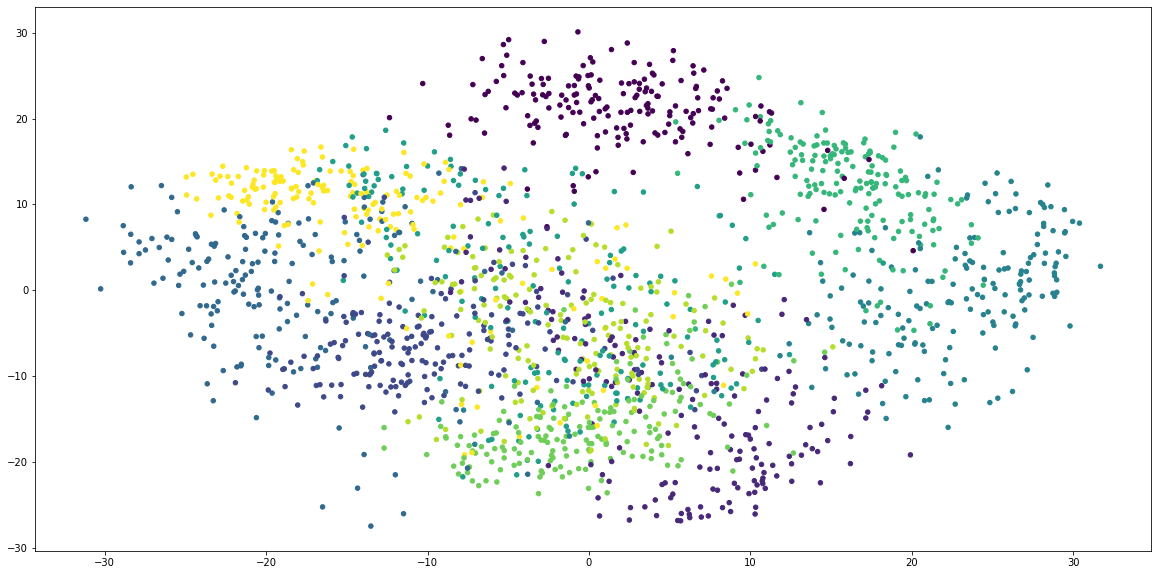

In [7]:
fig = plt.figure(figsize=(20,10))

plt.scatter(pca_data[:,0], pca_data[:,1], s=20, c=y)
plt.show()

We also notice that PCA suffers from **crowding problem**. Crowding problem refers to a case where a 2D map is not enough to accommodate all data-points.

Let's now look at t-SNE, which is an **unsupervised non-linear dimension reduction method** for data visualization.

In [8]:
tsne = TSNE(n_components=2)

tsne_data = tsne.fit_transform(X)

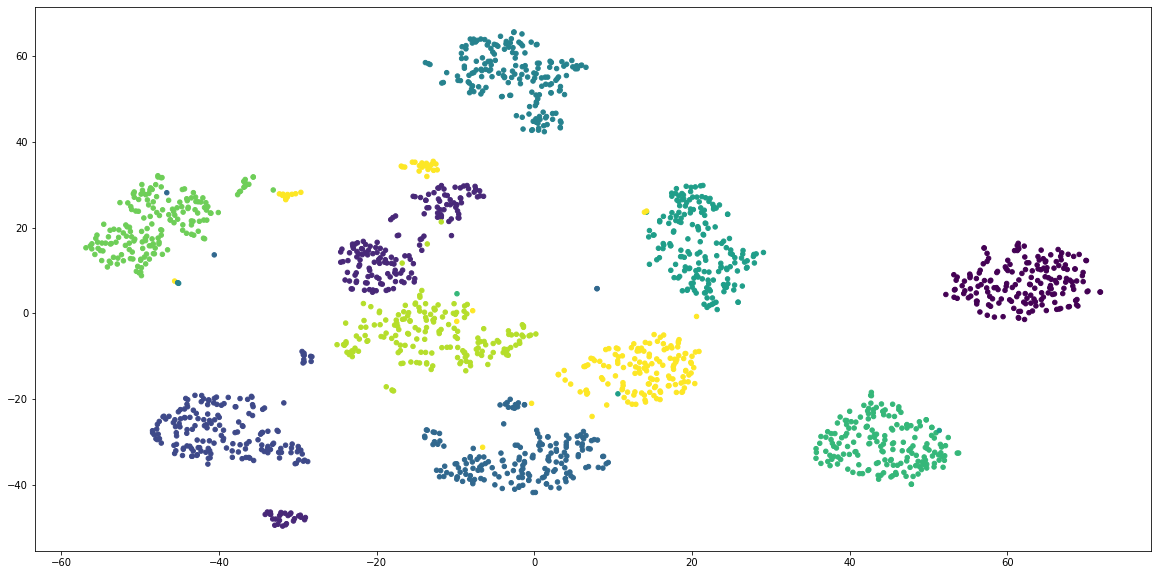

In [9]:
fig = plt.figure(figsize=(20,10))

plt.scatter(tsne_data[:,0], tsne_data[:,1], s=20, c=y)
plt.show()

We can notice that t-SNE does a fairly better job than PCA in terms of separating data points of different classes.